In [1]:
#Here we import the important libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Now here we read the dataset.

heart_df=pd.read_csv(r"C:\sudhanshu_projects\project-task-training-course\CardicArrest-prediction\heart_failure_dataset.csv")

In [3]:
#Now here we check the features of dataset.

heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
#Now here we check the shape of dataset.

heart_df.shape

#Here the shape of dataset is (299,13),mean 299 rows and 13 columns.

(299, 13)

In [7]:
#Now here we check is there any null value.

heart_df.isnull().sum()

#As there is no null value.

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
#Now here we check the data type of each feature.

heart_df.dtypes

#As each columns of datset are numeric data type.

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
#Now here we get the information about the dataset.

heart_df.info()

#As here we get the information about non-null value,datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [13]:
#Now here we get the descriptive statistic of datset.

heart_df.describe()

#As we get min,max,mean and other terms.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [15]:
#Now here we find the correlation between the features of dataset.

heart_df.corr()

#As death_event is mainly depends on age,serum_creatinine.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

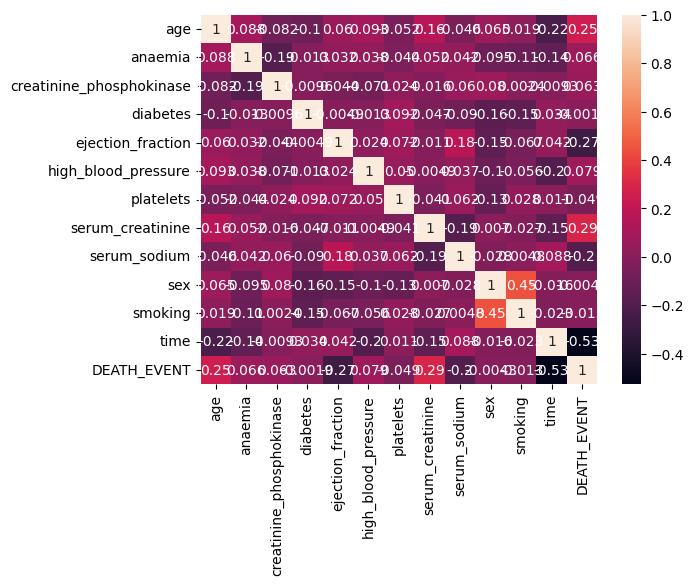

In [16]:
#Now here we get the heatmap of correlation

sns.heatmap(heart_df.corr(),annot=True)

In [17]:
#Now we get the tail of dataset.

heart_df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [35]:
#Now here we check the unique values and their counts of some columns of dataset.

cols=["anaemia","diabetes","high_blood_pressure","sex","smoking","ejection_fraction"]

for col in cols:
    print(f"The value count of {col} is: ")
    print(heart_df[col].value_counts())

#Here we see that no imbalance is occured in column data.

The value count of anaemia is: 
anaemia
0    170
1    129
Name: count, dtype: int64
The value count of diabetes is: 
diabetes
0    174
1    125
Name: count, dtype: int64
The value count of high_blood_pressure is: 
high_blood_pressure
0    194
1    105
Name: count, dtype: int64
The value count of sex is: 
sex
1    194
0    105
Name: count, dtype: int64
The value count of smoking is: 
smoking
0    203
1     96
Name: count, dtype: int64
The value count of ejection_fraction is: 
ejection_fraction
35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: count, dtype: int64


In [21]:
#Here we drop time column from the dataset.

heart_df.drop("time",axis=1,inplace=True)

#Here we permanently remove the time column from the dataset,becuase it is not important for predicting the result.

In [23]:
#Now here we check the columns of datset.

heart_df.columns

#So now remains only 12 columns in the dataset.

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

### Visualization

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

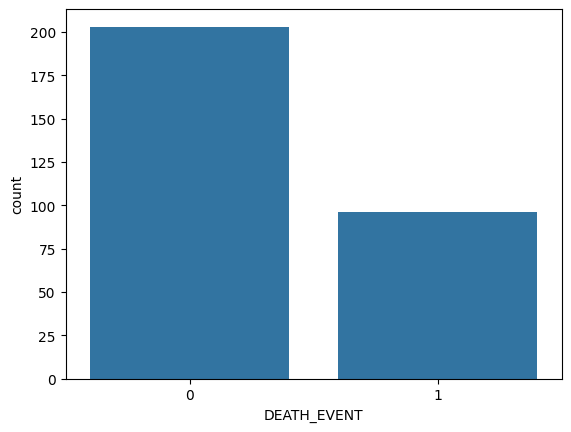

In [25]:
#Now here we make the countplot of dependent/targeted column.

sns.countplot(data=heart_df,x="DEATH_EVENT")

#Here we seen that the number of person survived is twice the number of person die.

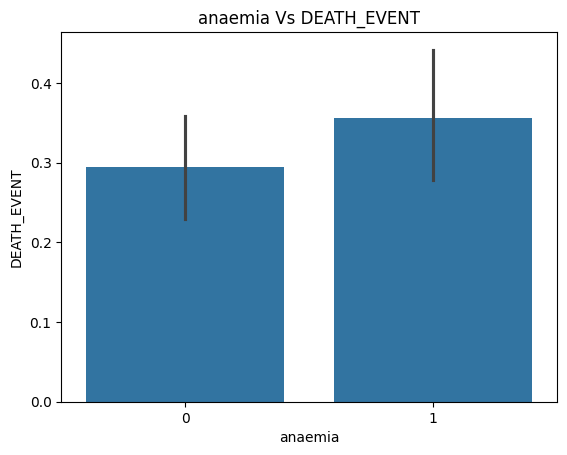

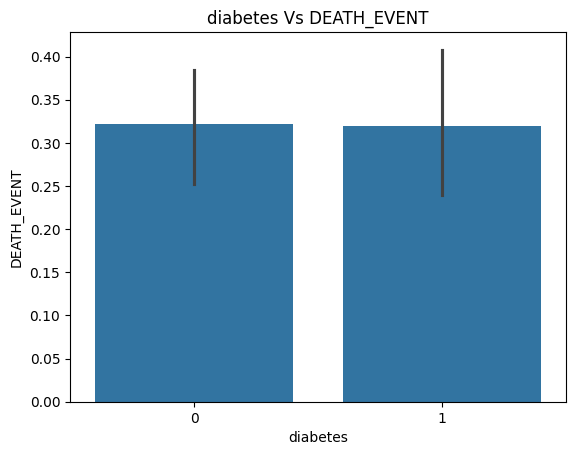

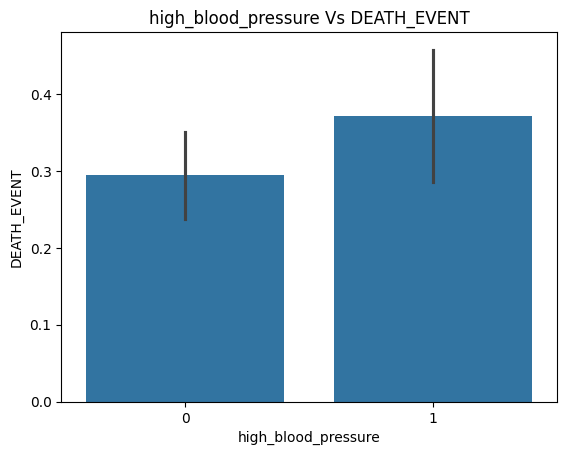

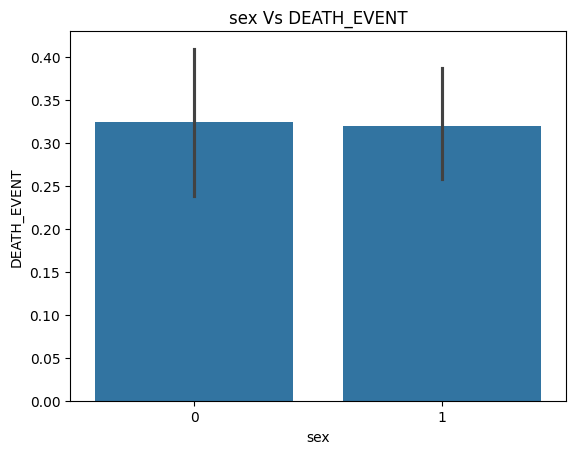

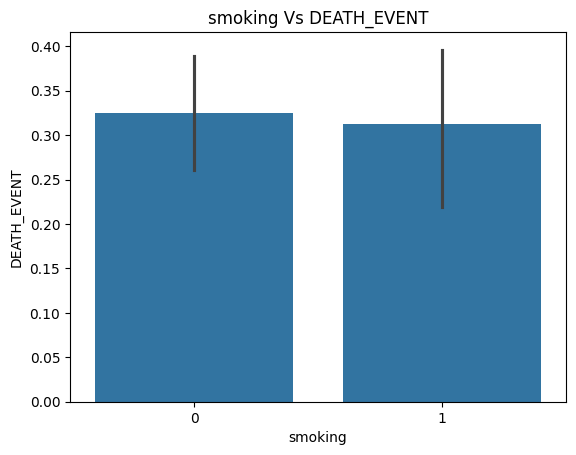

In [28]:
#Now here we create bar plot between different features.

x_cols=["anaemia","diabetes","high_blood_pressure","sex","smoking"]
y_cols="DEATH_EVENT"

for i in x_cols:
    sns.barplot(data=heart_df,x=i,y=y_cols)
    plt.title(f"{i} Vs {y_cols}")
    plt.xlabel(f"{i}")
    plt.ylabel(f"{y_cols}")
    plt.show()

#### Conclusion

##### (1)As when the person has anemia and high blood pressure,then more chance of death by heart attack.
##### (2)As when the person has smoking,sex=0 or 1 and diabetes,then not make so much affects on decision. 

In [29]:
#Name of columns of dataset.

heart_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [33]:
#Here we see the head of dataset.

heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


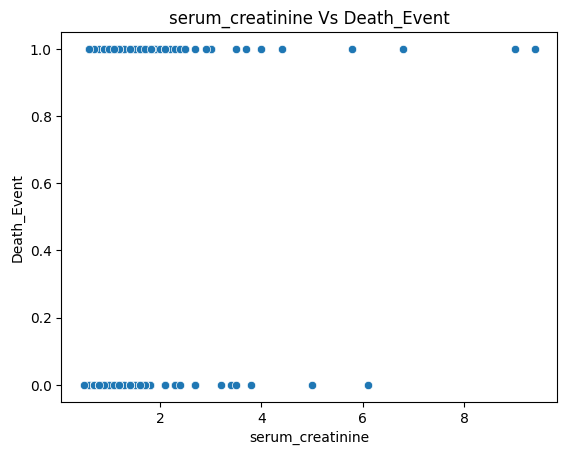

In [34]:
#Now here we plot scatter plot.

sns.scatterplot(data=heart_df,x="serum_creatinine",y="DEATH_EVENT")
plt.title("serum_creatinine Vs Death_Event")
plt.xlabel("serum_creatinine")
plt.ylabel("Death_Event")
plt.show()

#### Conclusion: As most of the serum creatinine is less than 4 and for all these the possibility of death event is very high.

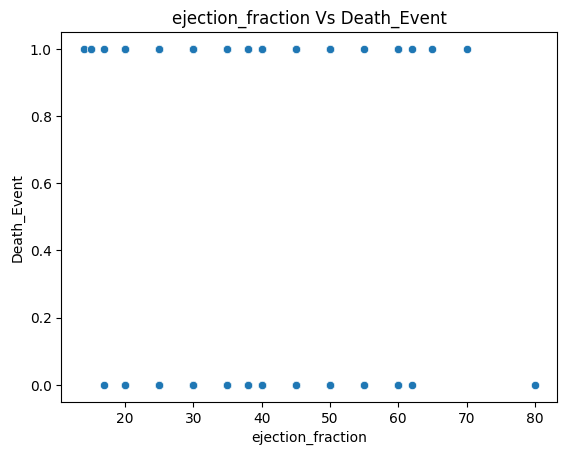

In [37]:
#Now here we plot scatter plot.

sns.scatterplot(data=heart_df,x="ejection_fraction",y="DEATH_EVENT")
plt.title("ejection_fraction Vs Death_Event")
plt.xlabel("ejection_fraction")
plt.ylabel("Death_Event")
plt.show()

#Conclusion: As from this we can't get any insights.

<Axes: xlabel='DEATH_EVENT', ylabel='Density'>

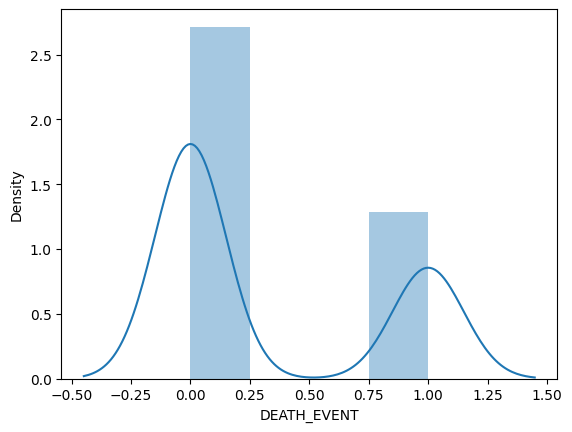

In [40]:
#Here we use ditribution plot.

sns.distplot(heart_df["DEATH_EVENT"])

#Here we seen that the death event value 0 is double than the death event value is 1.

### Now we do EDA operations.

In [41]:
#Here we get the shape of dataset.

heart_df.shape

(299, 12)

In [43]:
#Now here we select the Independent and Dependent feature.

x=heart_df.iloc[:,0:11].values #Here we make dependent features.

y=heart_df.iloc[:,11].values #Here we make independent features.


In [49]:
x.shape #Here we get the shape of Independent features.

(299, 11)

In [50]:
y.shape #Here we get the shape of Dependent features.

(299,)

In [52]:
#Now here we split the datset into train and test data.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
print(x_train.shape) #Here we get the shape of x_train .

print(x_test.shape) #Here we get the shape of x_test.

print(y_train.shape) #Here we get the shape of y_train.

print(y_test.shape) #Here we get the shape of y_test.

(239, 11)
(60, 11)
(239,)
(60,)


In [54]:
#Now here we do the feature scaling.

#Here we import the standard scaler library.
from sklearn.preprocessing import StandardScaler

#Here we create standard scaler model object.
sc=StandardScaler()

#Here we fit and transform the x_train using sc.
x_train_sc=sc.fit_transform(x_train)

#Here we transform the x_test using sc.
x_test_sc=sc.transform(x_test)

In [55]:
#Now here we do the normalization of data.

#Here we import the Normalizer library.
from sklearn.preprocessing import Normalizer

#Here we create normalizer model object.
nz=Normalizer()

#Here we fit and transform the x_train using sc.
x_train_nz=nz.fit_transform(x_train)

#Here we transform the x_test using sc.
x_test_nz=nz.transform(x_test)

### Now we apply classification models on dataset.

#### (1) Logistic Regression.


##### Here we use Sigmoid function, y=1/(1+e^-z) and it ranges from 0 to 1 and we make one threshold value and when value is equal and greater than threshold value then we take 1,otherwise 0.

In [56]:
#Here we import the logistic regression model.
from sklearn.linear_model import LogisticRegression

#Here we create logistic regression model object.
lr=LogisticRegression()

#Here we train the lr model on actual training data.
lr.fit(x_train,y_train)

#Here we predict the values using lr model.
y_pred_lr=lr.predict(x_test)

#Here we find the test score of lr model.
score_lr=lr.score(x_test,y_test)
print(f"The test score of lr model is {score_lr}.")

The test score of lr model is 0.6833333333333333.


In [60]:
#Now here we find the statistics of lr model.

#Here we import the important library.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Here we find the model accuracy of lr model.
ac_lr=accuracy_score(y_test,y_pred_lr)
print(f"The model accuracy of lr model is {ac_lr}.")
print()

#Here we find the confusion matrix of lr model.
cm=confusion_matrix(y_test,y_pred_lr)
print("The confusion matrix of lr model is: ")
print(cm)
print()

#Here we find the classification report of lr model.
cr=classification_report(y_test,y_pred_lr)
print("The classification report of lr model is: ")
print(cr)
print()

#Now here we compare the training vs testing accuracy.
bias=lr.score(x_train,y_train)
print(f"The bias of lr model is {bias}.")
print()

variance=lr.score(x_test,y_test)
print(f"The variance of lr model is {variance}.")
print()

The model accuracy of lr model is 0.6833333333333333.

The confusion matrix of lr model is: 
[[34  3]
 [16  7]]

The classification report of lr model is: 
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        37
           1       0.70      0.30      0.42        23

    accuracy                           0.68        60
   macro avg       0.69      0.61      0.60        60
weighted avg       0.69      0.68      0.64        60


The bias of lr model is 0.7782426778242678.

The variance of lr model is 0.6833333333333333.



#### Conclusion: As the bias and variance is near to each other,so this is best fit model.

#### 1(a) Now apply Logistic regression on scaled data.

In [61]:
#Here we create logistic regression model object.
lr1=LogisticRegression()

#Here we train the lr1 model on actual training data.
lr1.fit(x_train_sc,y_train)

#Here we predict the values using lr1 model.
y_pred_lr1=lr1.predict(x_test_sc)

#Here we find the test score of lr1 model.
score_lr1=lr1.score(x_test_sc,y_test)
print(f"The test score of lr1 model is {score_lr1}.")

The test score of lr1 model is 0.7333333333333333.


In [65]:
#Now here we find the statistics of lr1 model.

#Here we find the model accuracy of lr1 model.
ac_lr1=accuracy_score(y_test,y_pred_lr1)
print(f"The model accuracy of lr1 model is {ac_lr1}.")
print()

#Here we find the confusion matrix of lr1 model.
cm1=confusion_matrix(y_test,y_pred_lr1)
print("The confusion matrix of lr1 model is: ")
print(cm1)
print()

#Here we find the classification report of lr1 model.
cr1=classification_report(y_test,y_pred_lr1)
print("The classification report of lr1 model is: ")
print(cr1)
print()

#Now here we compare the training vs testing accuracy.
bias1=lr1.score(x_train_sc,y_train)
print(f"The bias of lr1 model is {bias1}.")
print()

variance1=lr1.score(x_test_sc,y_test)
print(f"The variance of lr1 model is {variance1}.")
print()

The model accuracy of lr1 model is 0.7333333333333333.

The confusion matrix of lr1 model is: 
[[35  2]
 [14  9]]

The classification report of lr1 model is: 
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        37
           1       0.82      0.39      0.53        23

    accuracy                           0.73        60
   macro avg       0.77      0.67      0.67        60
weighted avg       0.75      0.73      0.70        60


The bias of lr1 model is 0.7782426778242678.

The variance of lr1 model is 0.7333333333333333.



#### Conclusion: As the bias and variance is near to each other and also higher than lr,so this is best fit model.

#### 1(b) Now apply logistic regression on scaled data.

In [63]:
#Here we create logistic regression model object.
lr2=LogisticRegression()

#Here we train the lr2 model on actual training data.
lr2.fit(x_train_nz,y_train)

#Here we predict the values using lr2 model.
y_pred_lr2=lr2.predict(x_test_nz)

#Here we find the test score of lr2 model.
score_lr2=lr2.score(x_test_nz,y_test)
print(f"The test score of lr2 model is {score_lr2}.")

The test score of lr2 model is 0.6166666666666667.


In [64]:
#Now here we find the statistics of lr2 model.

#Here we find the model accuracy of lr2 model.
ac_lr2=accuracy_score(y_test,y_pred_lr2)
print(f"The model accuracy of lr2 model is {ac_lr2}.")
print()

#Here we find the confusion matrix of lr2 model.
cm2=confusion_matrix(y_test,y_pred_lr2)
print("The confusion matrix of lr2 model is: ")
print(cm2)
print()

#Here we find the classification report of lr2 model.
cr2=classification_report(y_test,y_pred_lr2)
print("The classification report of lr2 model is: ")
print(cr2)
print()

#Now here we compare the training vs testing accuracy.
bias2=lr2.score(x_train_nz,y_train)
print(f"The bias of lr2 model is {bias2}.")
print()

variance2=lr2.score(x_test_nz,y_test)
print(f"The variance of lr2 model is {variance2}.")
print()

The model accuracy of lr2 model is 0.6166666666666667.

The confusion matrix of lr2 model is: 
[[37  0]
 [23  0]]

The classification report of lr2 model is: 
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60


The bias of lr2 model is 0.694560669456067.

The variance of lr2 model is 0.6166666666666667.



#### Conclusion: As the bias and variance is near to each other,so this is best fit model.

### (2) Support Vector Classifier.

##### Here we create hyperplane and also the margin plane/decision plane . 

In [66]:
#Here we import the svc model.
from sklearn.svm import SVC

#Here we create svc model object.
svc=SVC()

#Here we train the svc model on original value.
svc.fit(x_train,y_train)

#Here we predict the values using svc model.
y_pred_svc=svc.predict(x_test)

#Here we find the accuracy of svc model.
score_svc=svc.score(x_test,y_test)
print(f"The accuracy of svc model is {score_svc}.")

The accuracy of svc model is 0.6166666666666667.


In [67]:
#Now here we find the statistics of svc model.

#Here we find the model accuracy of svc model.
ac_svc=accuracy_score(y_test,y_pred_svc)
print(f"The model accuracy of svc model is {ac_svc}.")
print()

#Here we find the confusion matrix of svc model.
cm_svc=confusion_matrix(y_test,y_pred_svc)
print("The confusion matrix of svc model is: ")
print(cm_svc)
print()

#Here we find the classification report of svc model.
cr_svc=classification_report(y_test,y_pred_svc)
print("The classification report of svc model is: ")
print(cr_svc)
print()

#Now here we compare the training vs testing accuracy.
bias_svc=svc.score(x_train,y_train)
print(f"The bias of svc model is {bias_svc}.")
print()

variance_svc=svc.score(x_test,y_test)
print(f"The variance of svc model is {variance_svc}.")
print()

The model accuracy of svc model is 0.6166666666666667.

The confusion matrix of svc model is: 
[[37  0]
 [23  0]]

The classification report of svc model is: 
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60


The bias of svc model is 0.694560669456067.

The variance of svc model is 0.6166666666666667.



#### Conclusion: As the bias and variance is near to each other,so this is best fit model.

### 2 (a) SVC using scaled data.

In [68]:
#Here we create svc model object.
svc1=SVC()

#Here we train the svc1 model on original value.
svc1.fit(x_train_sc,y_train)

#Here we predict the values using svc1 model.
y_pred_svc1=svc1.predict(x_test_sc)

#Here we find the accuracy of svc1 model.
score_svc1=svc1.score(x_test_sc,y_test)
print(f"The accuracy of svc1 model is {score_svc1}.")

The accuracy of svc1 model is 0.7166666666666667.


In [69]:
#Now here we find the statistics of svc1 model.

#Here we find the model accuracy of svc1 model.
ac_svc1=accuracy_score(y_test,y_pred_svc1)
print(f"The model accuracy of svc1 model is {ac_svc1}.")
print()

#Here we find the confusion matrix of svc1 model.
cm_svc1=confusion_matrix(y_test,y_pred_svc1)
print("The confusion matrix of svc1 model is: ")
print(cm_svc1)
print()

#Here we find the classification report of svc1 model.
cr_svc1=classification_report(y_test,y_pred_svc1)
print("The classification report of svc1 model is: ")
print(cr_svc1)
print()

#Now here we compare the training vs testing accuracy.
bias_svc1=svc1.score(x_train_sc,y_train)
print(f"The bias of svc1 model is {bias_svc1}.")
print()

variance_svc1=svc1.score(x_test_sc,y_test)
print(f"The variance of svc1 model is {variance_svc1}.")
print()

The model accuracy of svc1 model is 0.7166666666666667.

The confusion matrix of svc1 model is: 
[[33  4]
 [13 10]]

The classification report of svc1 model is: 
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        37
           1       0.71      0.43      0.54        23

    accuracy                           0.72        60
   macro avg       0.72      0.66      0.67        60
weighted avg       0.72      0.72      0.70        60


The bias of svc1 model is 0.8577405857740585.

The variance of svc1 model is 0.7166666666666667.



#### Conclusion: Here the variance and bias is almost near to each other and also high value,so it is best fit model.

### 2(b) Now SVC on normalized data.

In [70]:
#Here we create svc model object.
svc2=SVC()

#Here we train the svc2 model on original value.
svc2.fit(x_train_nz,y_train)

#Here we predict the values using svc2 model.
y_pred_svc2=svc2.predict(x_test_nz)

#Here we find the accuracy of svc2 model.
score_svc2=svc2.score(x_test_nz,y_test)
print(f"The accuracy of svc2 model is {score_svc2}.")

The accuracy of svc2 model is 0.6166666666666667.


In [71]:
#Now here we find the statistics of svc2 model.

#Here we find the model accuracy of svc2 model.
ac_svc2=accuracy_score(y_test,y_pred_svc2)
print(f"The model accuracy of svc2 model is {ac_svc2}.")
print()

#Here we find the confusion matrix of svc2 model.
cm_svc2=confusion_matrix(y_test,y_pred_svc2)
print("The confusion matrix of svc2 model is: ")
print(cm_svc2)
print()

#Here we find the classification report of svc2 model.
cr_svc2=classification_report(y_test,y_pred_svc2)
print("The classification report of svc2 model is: ")
print(cr_svc2)
print()

#Now here we compare the training vs testing accuracy.
bias_svc2=svc2.score(x_train_nz,y_train)
print(f"The bias of svc2 model is {bias_svc2}.")
print()

variance_svc2=svc2.score(x_test_nz,y_test)
print(f"The variance of svc2 model is {variance_svc2}.")
print()

The model accuracy of svc2 model is 0.6166666666666667.

The confusion matrix of svc2 model is: 
[[37  0]
 [23  0]]

The classification report of svc2 model is: 
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60


The bias of svc2 model is 0.694560669456067.

The variance of svc2 model is 0.6166666666666667.



#### Conclusion: Here the bias and variance is almost near,so it is also best fit model.

### (3) Knearest neighbour classifier.

##### Here we use euclidian distance and choose k neighbour and then take the mode of k values. 

In [75]:
#Here we import the knc model.
from sklearn.neighbors import KNeighborsClassifier

#Here we create knc model object.
knc=KNeighborsClassifier()

#Here we train the knc model on actual value.
knc.fit(x_train,y_train)

#Here we predict the values using knc model.
y_pred_knc=knc.predict(x_test)

#Here we find the testing accuracy of knc value.
score_knc=knc.score(x_test,y_test)
print(f"The test accuracy of knc model is {score_knc}.")

The test accuracy of knc model is 0.5166666666666667.


In [76]:
#Now here we find the statistics of knc model.

#Here we find the model accuracy of knc model.
ac_knc=accuracy_score(y_test,y_pred_knc)
print(f"The model accuracy of knc model is {ac_knc}.")
print()

#Here we find the confusion matrix of knc model.
cm_knc=confusion_matrix(y_test,y_pred_knc)
print("The confusion matrix of knc model is: ")
print(cm_knc)
print()

#Here we find the classification report of knc model.
cr_knc=classification_report(y_test,y_pred_knc)
print("The classification report of knc model is: ")
print(cr_knc)
print()

#Now here we compare the training vs testing accuracy.
bias_knc=knc.score(x_train,y_train)
print(f"The bias of knc model is {bias_knc}.")
print()

variance_knc=knc.score(x_test,y_test)
print(f"The variance of knc model is {variance_knc}.")
print()

The model accuracy of knc model is 0.5166666666666667.

The confusion matrix of knc model is: 
[[27 10]
 [19  4]]

The classification report of knc model is: 
              precision    recall  f1-score   support

           0       0.59      0.73      0.65        37
           1       0.29      0.17      0.22        23

    accuracy                           0.52        60
   macro avg       0.44      0.45      0.43        60
weighted avg       0.47      0.52      0.48        60


The bias of knc model is 0.7615062761506276.

The variance of knc model is 0.5166666666666667.



#### Conclusion: As here the difference between bias and variance is very high,so this is not a best fit model.

### 3(a) Knc on scaled data.

In [77]:
#Here we create knc model object.
knc1=KNeighborsClassifier()

#Here we train the knc1 model on actual value.
knc1.fit(x_train_sc,y_train)

#Here we predict the values using knc1 model.
y_pred_knc1=knc1.predict(x_test_sc)

#Here we find the testing accuracy of knc1 value.
score_knc1=knc1.score(x_test_sc,y_test)
print(f"The test accuracy of knc1 model is {score_knc1}.")

The test accuracy of knc1 model is 0.6333333333333333.


In [78]:
#Now here we find the statistics of knc1 model.

#Here we find the model accuracy of knc1 model.
ac_knc1=accuracy_score(y_test,y_pred_knc1)
print(f"The model accuracy of knc1 model is {ac_knc1}.")
print()

#Here we find the confusion matrix of knc1 model.
cm_knc1=confusion_matrix(y_test,y_pred_knc1)
print("The confusion matrix of knc1 model is: ")
print(cm_knc1)
print()

#Here we find the classification report of knc1 model.
cr_knc1=classification_report(y_test,y_pred_knc1)
print("The classification report of knc1 model is: ")
print(cr_knc1)
print()

#Now here we compare the training vs testing accuracy.
bias_knc1=knc1.score(x_train_sc,y_train)
print(f"The bias of knc1 model is {bias_knc1}.")
print()

variance_knc1=knc1.score(x_test_sc,y_test)
print(f"The variance of knc1 model is {variance_knc1}.")
print()

The model accuracy of knc1 model is 0.6333333333333333.

The confusion matrix of knc1 model is: 
[[33  4]
 [18  5]]

The classification report of knc1 model is: 
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        37
           1       0.56      0.22      0.31        23

    accuracy                           0.63        60
   macro avg       0.60      0.55      0.53        60
weighted avg       0.61      0.63      0.58        60


The bias of knc1 model is 0.7782426778242678.

The variance of knc1 model is 0.6333333333333333.



### Conclusion: As here the difference between the training and testing accuracy is high,so it is not best fit model.

### (4) Decision tree classifier.

In [81]:
#Here we import the decision tree classifier model.
from sklearn.tree import DecisionTreeClassifier

#Here we create dtr model object.
dtr=DecisionTreeClassifier()

#Here we train the dtr model on actual value.
dtr.fit(x_train,y_train)

#Here we predict the values using dtr model.
y_pred_dtr=dtr.predict(x_test)

#Here we find the test accuracy of dtr model.
score_dtr=dtr.score(x_test,y_test)
print(f"The test accuracy of dtr model is {score_dtr}.")

The test accuracy of dtr model is 0.65.


In [82]:
#Now here we find the statistics of dtr model.

#Here we find the model accuracy of dtr model.
ac_dtr=accuracy_score(y_test,y_pred_dtr)
print(f"The model accuracy of dtr model is {ac_dtr}.")
print()

#Here we find the confusion matrix of dtr model.
cm_dtr=confusion_matrix(y_test,y_pred_dtr)
print("The confusion matrix of dtr model is: ")
print(cm_dtr)
print()

#Here we find the classification report of dtr model.
cr_dtr=classification_report(y_test,y_pred_dtr)
print("The classification report of dtr model is: ")
print(cr_dtr)
print()

#Now here we compare the training vs testing accuracy.
bias_dtr=dtr.score(x_train,y_train)
print(f"The bias of dtr model is {bias_dtr}.")
print()

variance_dtr=dtr.score(x_test,y_test)
print(f"The variance of dtr model is {variance_dtr}.")
print()

The model accuracy of dtr model is 0.65.

The confusion matrix of dtr model is: 
[[30  7]
 [14  9]]

The classification report of dtr model is: 
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        37
           1       0.56      0.39      0.46        23

    accuracy                           0.65        60
   macro avg       0.62      0.60      0.60        60
weighted avg       0.64      0.65      0.63        60


The bias of dtr model is 1.0.

The variance of dtr model is 0.65.



#### Conclusion: As the difference between the bias and variance is very high,so it is not a best fit model.

### 4(a) Dtr model on scaled data.

In [83]:
#Here we create dtr1 model object.
dtr1=DecisionTreeClassifier()

#Here we train the dtr1 model on actual value.
dtr1.fit(x_train_sc,y_train)

#Here we predict the values using dtr1 model.
y_pred_dtr1=dtr1.predict(x_test_sc)

#Here we find the test accuracy of dtr1 model.
score_dtr1=dtr1.score(x_test_sc,y_test)
print(f"The test accuracy of dtr1 model is {score_dtr1}.")

The test accuracy of dtr1 model is 0.65.


In [84]:
#Now here we find the statistics of dtr1 model.

#Here we find the model accuracy of dtr1 model.
ac_dtr1=accuracy_score(y_test,y_pred_dtr1)
print(f"The model accuracy of dtr1 model is {ac_dtr1}.")
print()

#Here we find the confusion matrix of dtr1 model.
cm_dtr1=confusion_matrix(y_test,y_pred_dtr1)
print("The confusion matrix of dtr1 model is: ")
print(cm_dtr1)
print()

#Here we find the classification report of dtr1 model.
cr_dtr1=classification_report(y_test,y_pred_dtr1)
print("The classification report of dtr1 model is: ")
print(cr_dtr1)
print()

#Now here we compare the training vs testing accuracy.
bias_dtr1=dtr1.score(x_train_sc,y_train)
print(f"The bias of dtr1 model is {bias_dtr1}.")
print()

variance_dtr1=dtr1.score(x_test_sc,y_test)
print(f"The variance of dtr1 model is {variance_dtr1}.")
print()

The model accuracy of dtr1 model is 0.65.

The confusion matrix of dtr1 model is: 
[[30  7]
 [14  9]]

The classification report of dtr1 model is: 
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        37
           1       0.56      0.39      0.46        23

    accuracy                           0.65        60
   macro avg       0.62      0.60      0.60        60
weighted avg       0.64      0.65      0.63        60


The bias of dtr1 model is 1.0.

The variance of dtr1 model is 0.65.



### Conclusion: Here the difference between bias and variance is very large,so this is not a best fit model.

### (5) Random forest classifier.

In [85]:
#Here we import the random forest classifier model.
from sklearn.ensemble import RandomForestClassifier

#Here we create random forest classifier model object.
rfc=RandomForestClassifier()

#Here we train the rfc model on actual value.
rfc.fit(x_train,y_train)

#Here we predict the values using rfc model.
y_pred_rfc=rfc.predict(x_test)

#Here we find the test accuracy of rfc model.
score_rfc=rfc.score(x_test,y_test)
print(f"The test accuracy of rfc model is {score_rfc}.")

The test accuracy of rfc model is 0.6666666666666666.


In [87]:
#Now here we find the statistics of rfc model.

#Here we find the model accuracy of rfc model.
ac_rfc=accuracy_score(y_test,y_pred_rfc)
print(f"The model accuracy of rfc model is {ac_rfc}.")
print()

#Here we find the confusion matrix of rfc model.
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
print("The confusion matrix of rfc model is: ")
print(cm_rfc)
print()

#Here we find the classification report of rfc model.
cr_rfc=classification_report(y_test,y_pred_rfc)
print("The classification report of rfc model is: ")
print(cr_rfc)
print()

#Now here we compare the training vs testing accuracy.
bias_rfc=rfc.score(x_train,y_train)
print(f"The bias of rfc model is {bias_rfc}.")
print()

variance_rfc=rfc.score(x_test,y_test)
print(f"The variance of rfc model is {variance_rfc}.")
print()

The model accuracy of rfc model is 0.6666666666666666.

The confusion matrix of rfc model is: 
[[32  5]
 [15  8]]

The classification report of rfc model is: 
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        37
           1       0.62      0.35      0.44        23

    accuracy                           0.67        60
   macro avg       0.65      0.61      0.60        60
weighted avg       0.66      0.67      0.64        60


The bias of rfc model is 1.0.

The variance of rfc model is 0.6666666666666666.



#### Conclusion: As here the difference between the bias and variance is very large,so it is not best fit model.

### 5(a) Random forest classifier on scaled data.

In [88]:
#Here we create random forest classifier model object.
rfc1=RandomForestClassifier()

#Here we train the rfc1 model on actual value.
rfc1.fit(x_train_sc,y_train)

#Here we predict the values using rfc1 model.
y_pred_rfc1=rfc1.predict(x_test_sc)

#Here we find the test accuracy of rfc1 model.
score_rfc1=rfc1.score(x_test_sc,y_test)
print(f"The test accuracy of rfc1 model is {score_rfc1}.")

The test accuracy of rfc1 model is 0.7166666666666667.


In [89]:
#Now here we find the statistics of rfc1 model.

#Here we find the model accuracy of rfc1 model.
ac_rfc1=accuracy_score(y_test,y_pred_rfc1)
print(f"The model accuracy of rfc1 model is {ac_rfc1}.")
print()

#Here we find the confusion matrix of rfc1 model.
cm_rfc1=confusion_matrix(y_test,y_pred_rfc1)
print("The confusion matrix of rfc1 model is: ")
print(cm_rfc1)
print()

#Here we find the classification report of rfc1 model.
cr_rfc1=classification_report(y_test,y_pred_rfc1)
print("The classification report of rfc1 model is: ")
print(cr_rfc1)
print()

#Now here we compare the training vs testing accuracy.
bias_rfc1=rfc1.score(x_train_sc,y_train)
print(f"The bias of rfc1 model is {bias_rfc1}.")
print()

variance_rfc1=rfc1.score(x_test_sc,y_test)
print(f"The variance of rfc1 model is {variance_rfc1}.")
print()

The model accuracy of rfc1 model is 0.7166666666666667.

The confusion matrix of rfc1 model is: 
[[33  4]
 [13 10]]

The classification report of rfc1 model is: 
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        37
           1       0.71      0.43      0.54        23

    accuracy                           0.72        60
   macro avg       0.72      0.66      0.67        60
weighted avg       0.72      0.72      0.70        60


The bias of rfc1 model is 1.0.

The variance of rfc1 model is 0.7166666666666667.



### Conclusion: Here also the difference between the bias and variance is very large,so it is not the best fit model.

#### Here now we compare the result of each model.

In [93]:
result_df=pd.DataFrame(np.c_[y_test,y_pred_lr,y_pred_lr1,y_pred_lr2,y_pred_svc,y_pred_svc1,y_pred_svc2,y_pred_knc,y_pred_knc1,y_pred_dtr,y_pred_dtr1,y_pred_rfc,y_pred_rfc1],columns=["y_test","y_pred_lr","y_pred_lr1","y_pred_lr2","y_pred_svc","y_pred_svc1","y_pred_svc2","y_pred_knc","y_pred_knc1","y_pred_dtr","y_pred_dtr1","y_pred_rfc","y_pred_rfc1"])

In [94]:
result_df

,y_test,y_pred_lr,y_pred_lr1,y_pred_lr2,y_pred_svc,y_pred_svc1,y_pred_svc2,y_pred_knc,y_pred_knc1,y_pred_dtr,y_pred_dtr1,y_pred_rfc,y_pred_rfc1
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,1,0,0,1,0,0,1,1,1,1,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,1,0,0,1,1,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
score_df=pd.DataFrame(np.c_[score_lr,score_lr1,score_lr2,score_svc,score_svc1,score_svc2,score_knc,score_knc1,score_dtr,score_dtr1,score_rfc,score_rfc1],columns=["score_lr","score_lr1","score_lr2","score_svc","score_svc1","score_svc2","score_knc","score_knc1","score_dtr","score_dtr1","score_rfc","score_rfc1"])

In [96]:
score_df

,score_lr,score_lr1,score_lr2,score_svc,score_svc1,score_svc2,score_knc,score_knc1,score_dtr,score_dtr1,score_rfc,score_rfc1
0,0.683333,0.733333,0.616667,0.616667,0.716667,0.616667,0.516667,0.633333,0.65,0.65,0.666667,0.716667


In [97]:
score_df1=pd.DataFrame(np.c_[bias,bias1,bias2,bias_svc,bias_svc1,bias_svc2,bias_knc,bias_knc1,bias_dtr,bias_dtr1,bias_rfc,bias_rfc1],columns=["score_lr","score_lr1","score_lr2","score_svc","score_svc1","score_svc2","score_knc","score_knc1","score_dtr","score_dtr1","score_rfc","score_rfc1"])

In [98]:
score_df1

,score_lr,score_lr1,score_lr2,score_svc,score_svc1,score_svc2,score_knc,score_knc1,score_dtr,score_dtr1,score_rfc,score_rfc1
0,0.778243,0.778243,0.694561,0.694561,0.857741,0.694561,0.761506,0.778243,1.0,1.0,1.0,1.0


In [99]:
train_test_score_df = pd.concat([score_df1, score_df], axis=0,ignore_index=True)

In [100]:
train_test_score_df

,score_lr,score_lr1,score_lr2,score_svc,score_svc1,score_svc2,score_knc,score_knc1,score_dtr,score_dtr1,score_rfc,score_rfc1
0,0.778243,0.778243,0.694561,0.694561,0.857741,0.694561,0.761506,0.778243,1.00,1.00,1.000000,1.000000
1,0.683333,0.733333,0.616667,0.616667,0.716667,0.616667,0.516667,0.633333,0.65,0.65,0.666667,0.716667


#### Conclusion : So,from here we get to know that the best model is lr1 model i.e Logistic regression model on scaled data. 

#### Now we save the best model.

In [107]:
pickle.dump(lr1,open(r"C:\sudhanshu_projects\project-task-training-course\CardicArrest-prediction\heart_failure_prediction.pkl","wb"))

#### Now we load the save model and test.

In [108]:
model = pickle.load(open(r"C:\sudhanshu_projects\project-task-training-course\CardicArrest-prediction\heart_failure_prediction.pkl","rb"))

In [109]:
#Now test the model.

model.score(x_test_sc,y_test)

0.7333333333333333